<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week07-Model-Evaluation/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ![](http://)**1. Hold-out method**

In [22]:
import numpy as np
from numpy import random
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

X, y = np.arange(10).reshape((5, 2)),random.rand(5) # 4 columns, 100 rows, 80:20%
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('X train ', X_train)
print('y train ', y_train)
print('X test ', X_test)
print('y test ', y_test)

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('y_pred ', y_pred)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[0.76 0.47 0.23 0.58 0.17]
X train  [[8 9]
 [4 5]
 [0 1]
 [6 7]]
y train  [0.17 0.23 0.76 0.58]
X test  [[2 3]]
y test  [0.47]
y_pred  [0.58]
nan
0.012544595613907892


### **Cross Validation (Grid search)**

In [23]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
iris = datasets.load_iris()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)
print(C)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

clf = LogisticRegression()
#print(clf.get_params())
model = GridSearchCV(clf, hyperparameters, cv=5, verbose=0)
best_model = model.fit(iris.data, iris.target)

# View best hyperparameters
print('Best params:', best_model.best_params_)
print(best_model.best_estimator_)

[1.00 2.78 7.74 21.54 59.95 166.81 464.16 1291.55 3593.81 10000.00]
Best params: {'C': 7.742636826811269, 'penalty': 'l2'}
LogisticRegression(C=7.742636826811269)


# **3. Confusion matrix**

In [24]:
from sklearn.metrics import confusion_matrix
y_true = [0, 0, 0, 1, 1, 1, 1, 1, 0, 1]
y_pred = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

test = confusion_matrix(y_true, y_pred)
print(test.shape) #2D array
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() #1D array
print("tp=",tp," fp=",fp)
print("fn=",fn," tn=", tn)

from sklearn import metrics

precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)
f1 = metrics.f1_score(y_true, y_pred)
accuracy = metrics.accuracy_score(y_true, y_pred)

print("accuracy = ", accuracy)
print("precision = ",precision)
print("recall = ", recall)
print("f1 = ", f1)

print("**************")

target_names = ['class 0', 'class 1']
print(metrics.classification_report(y_true, y_pred, target_names=target_names))

(2, 2)
tp= 6  fp= 1
fn= 0  tn= 3
accuracy =  0.9
precision =  0.8571428571428571
recall =  1.0
f1 =  0.923076923076923
**************
              precision    recall  f1-score   support

     class 0       1.00      0.75      0.86         4
     class 1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



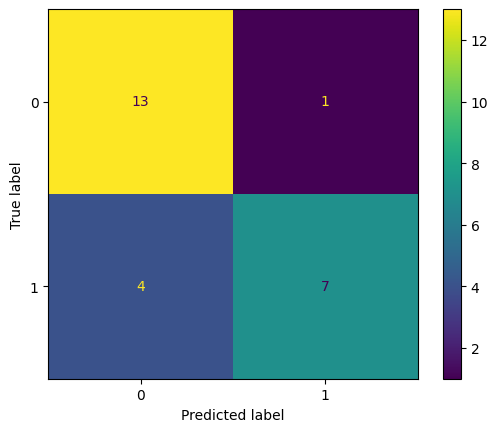

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

X, y = make_classification(random_state=0)
#print("X = ",X)
#print("y = ",y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123) #75:25

clf = LogisticRegression()

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()


(1000, 20)
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.919


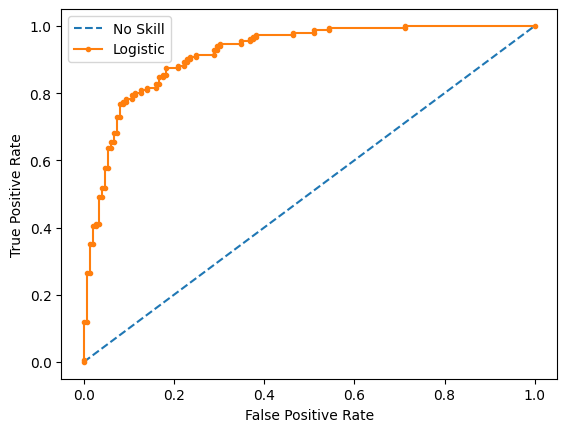

In [26]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
print(X.shape)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
model = LogisticRegression()
model.fit(trainX, trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()
